# Ⅰ. Intorduction

Titanic accident was one of the major accident in early 20th century. On April 10, 1912, Captain E · J · Smith, flight attendant, and passengers joined Southampton, England, with more than 2,200 people on their first voyage.


# Ⅱ. Method

 The Train data set and the test data were directly downloaded from the Kaggle website (http://). Train data was used to estimate survival of passengers. All related predictor variables (i.e. age, gender), PDCAP (1st class, 2st class), and the CCAT-PF score were included in the models. Statistical analyses were conducted using Python version 12.0. 
And, for the data analysis, the pandas module of python version 13.1 was used. Our initial machine learning(RF, XGboost, Logistic etc) was performed considering all selected variables. Based on the analysis results, a few meaningless variables were removed to improve performance.

# Importing Libraries

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [56]:
!pip install plotnine 
from plotnine import *

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score 

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, LabelBinarizer, scale, Normalizer, PowerTransformer, MaxAbsScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
!pip install xgboost
import xgboost as xgb 

In [ ]:
#!pip install lightgbm
import lightgbm as lgb

In [60]:
# color palletes
male_female_pal = ['#3489d6', '#e64072']
survival_pal = ['#2a2a2a', '#ff0000']
sns.set_palette(survival_pal)
sns.set_style("whitegrid")


# Load Dataset

In [61]:
train = pd.read_csv('../input/train.csv')
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
test = pd.read_csv('../input/test.csv')
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
gender_submission = pd.read_csv('../input/gender_submission.csv')
print(gender_submission.shape)
gender_submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Preprocessing

In [64]:
combi = pd.concat([train, test]) 
print(combi.shape)
combi.head()
combi.info()

(1309, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Data visualization

In [65]:
!pip install missingno 
import missingno as msno


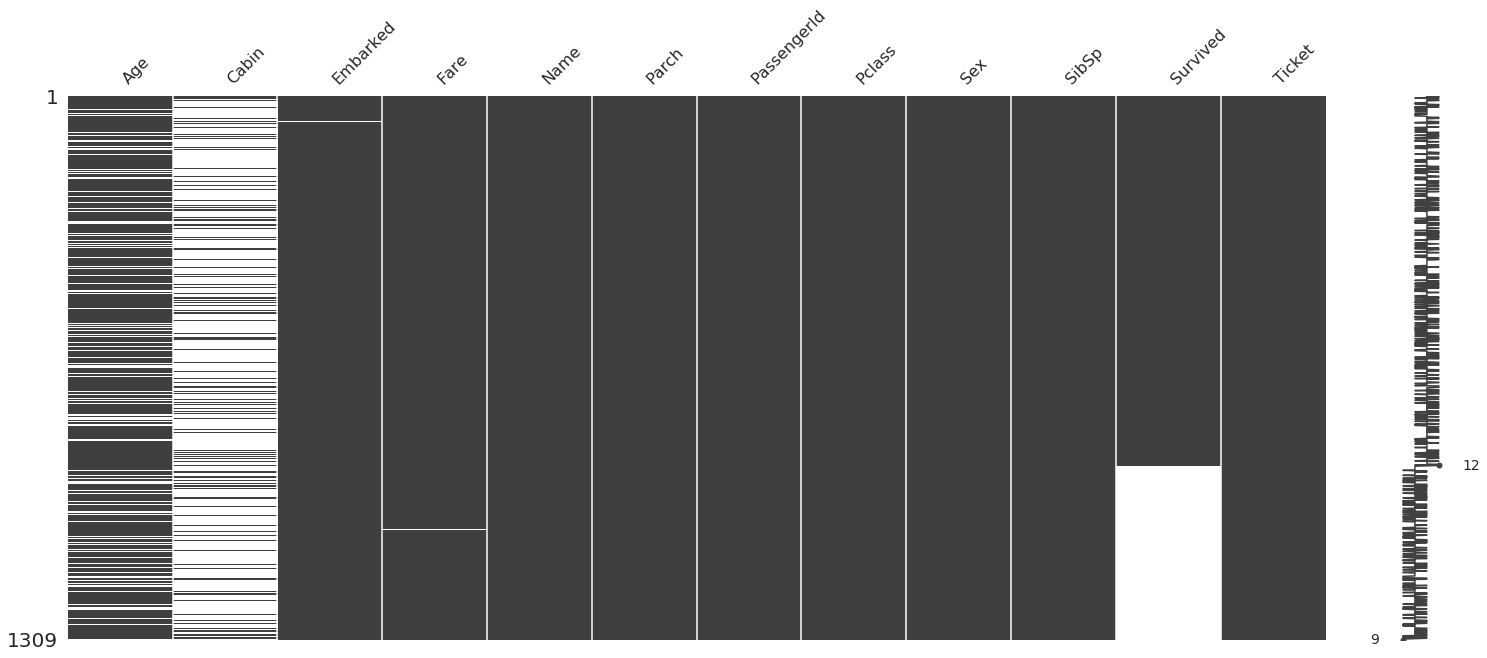

In [66]:
msno.matrix(combi)

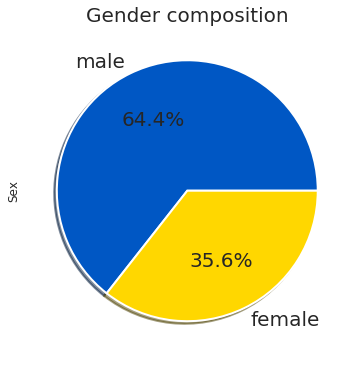

In [67]:
combi["Sex"]
plt.figure(figsize=(6,6))
combi["Sex"].value_counts().plot.pie(autopct = "%1.1f%%",colors = sns.color_palette("prism",3),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Gender composition",fontsize=20)
plt.show()

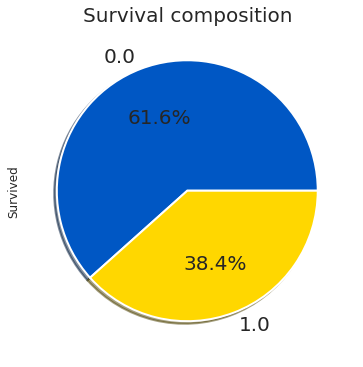

In [68]:
combi["Survived"]
plt.figure(figsize=(6,6))
combi["Survived"].value_counts().plot.pie(autopct = "%1.1f%%",colors = sns.color_palette("prism",3),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Survival composition",fontsize=20)
plt.show()

/opt/conda/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/opt/conda/lib/python3.6/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  return Bunch(x=xsc, y=ysc)
/opt/conda/lib/python3.6/site-packages/plotnine/layer.py:433: UserW

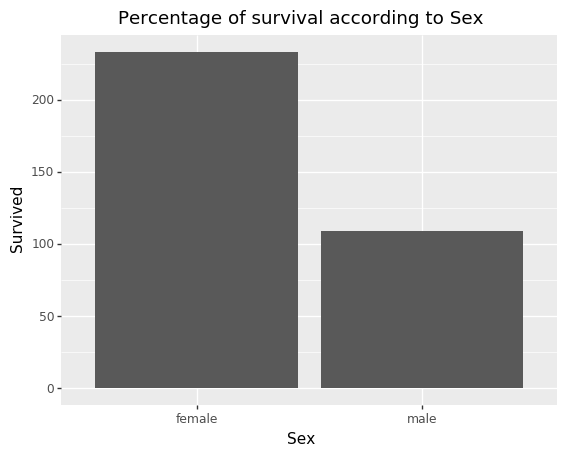

<ggplot: (-9223363261743717383)>

In [69]:
(ggplot(combi)
 + aes(x='Sex', y='Survived')
 + geom_col()
 + ggtitle('Percentage of survival according to Sex')
 + theme(text=element_text(family='NanumBarunGothic'))
)

Percentage of females who survived: 74.20382165605095
Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924
Percentage of males who survived: 18.890814558058924


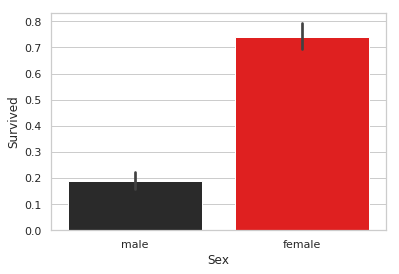

In [70]:
sns.barplot(x="Sex", y="Survived", data=combi) 
#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of females who survived:", combi["Survived"][combi["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", combi["Survived"][combi["Sex"] == 'male'].value_counts(normalize = True)[1]*100)
# females have a much higher chance of survival than males.


/opt/conda/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/opt/conda/lib/python3.6/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  return Bunch(x=xsc, y=ysc)
/opt/conda/lib/python3.6/site-packages/plotnine/layer.py:433: UserW

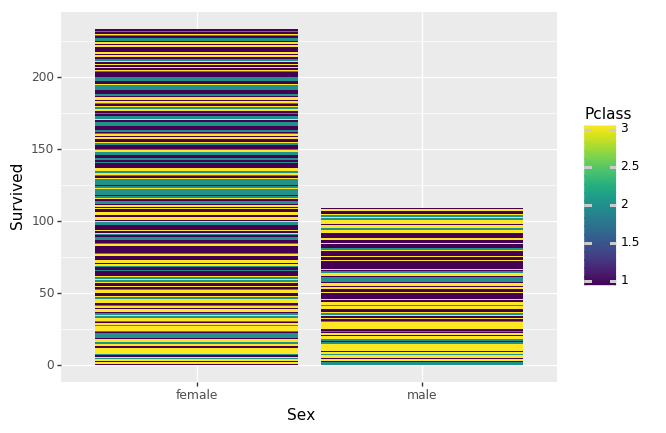

<ggplot: (-9223363261743633341)>

In [71]:
(ggplot(combi)
 + aes(x='Sex', y='Survived', fill='Pclass')
 + geom_col()
)

/opt/conda/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/opt/conda/lib/python3.6/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  return Bunch(x=xsc, y=ysc)
/opt/conda/lib/python3.6/site-packages/plotnine/layer.py:452: UserW

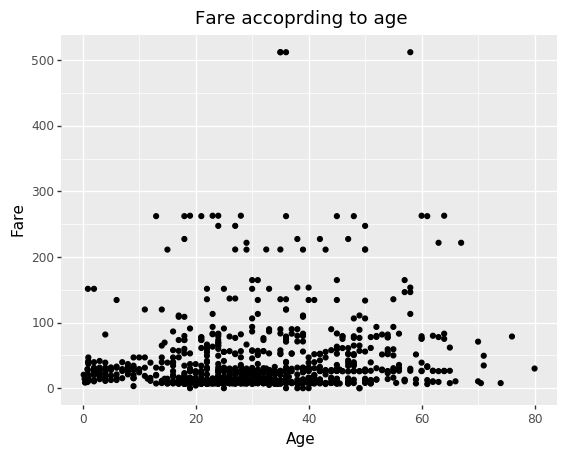

<ggplot: (8775110972620)>

In [72]:
(ggplot(combi)
 + aes(x='Age', y='Fare') 
 + geom_point()
 + ggtitle('Fare accoprding to age')
 + theme(text=element_text(family='NanumBarunGothic'))
)

/opt/conda/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/opt/conda/lib/python3.6/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  return Bunch(x=xsc, y=ysc)
/opt/conda/lib/python3.6/site-packages/plotnine/stats/smoothers.py:

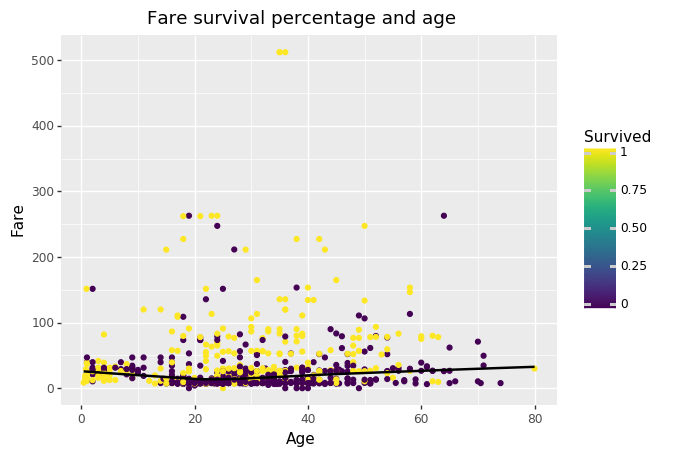

<ggplot: (8775111003796)>

In [73]:
(ggplot(train)
 + aes(x='Age', y='Fare', color='Survived') 
 + geom_point()
 + stat_smooth()
 + ggtitle('Fare survival percentage and age')
 + theme(text=element_text(family='NanumBarunGothic'))
)

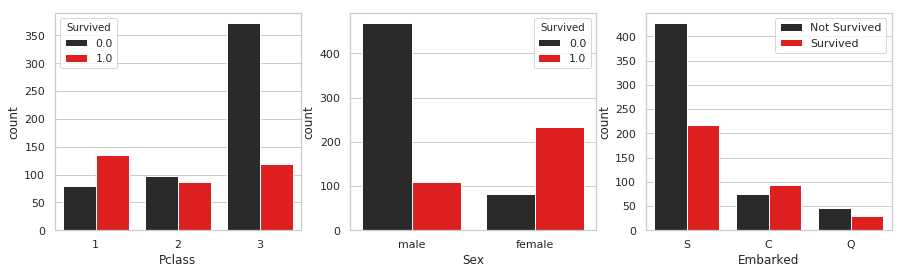

In [74]:
cat_cols = ['Pclass', 'Sex', 'Embarked']
fig, ax = plt.subplots(1, 3, figsize=(15, 4)) 
for ind, val in enumerate(cat_cols):
    sns.countplot(x=val, hue='Survived', data=combi, ax=ax[ind]) 
    plt.legend(['Not Survived', 'Survived'])

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


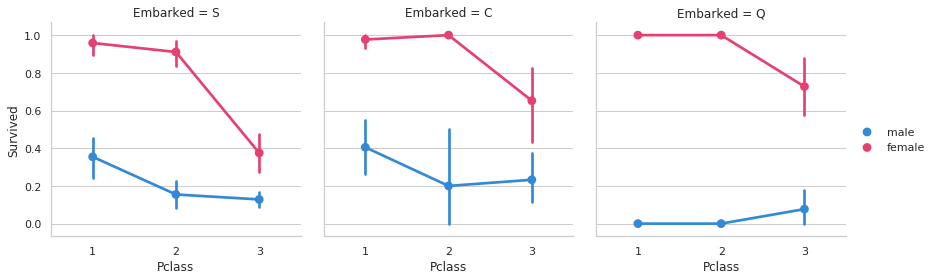

In [75]:
g = sns.FacetGrid(combi, col='Embarked', size=4) 
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=[1, 2, 3], hue_order=['male', 'female'], palette=male_female_pal) 
g.add_legend()
plt.show()

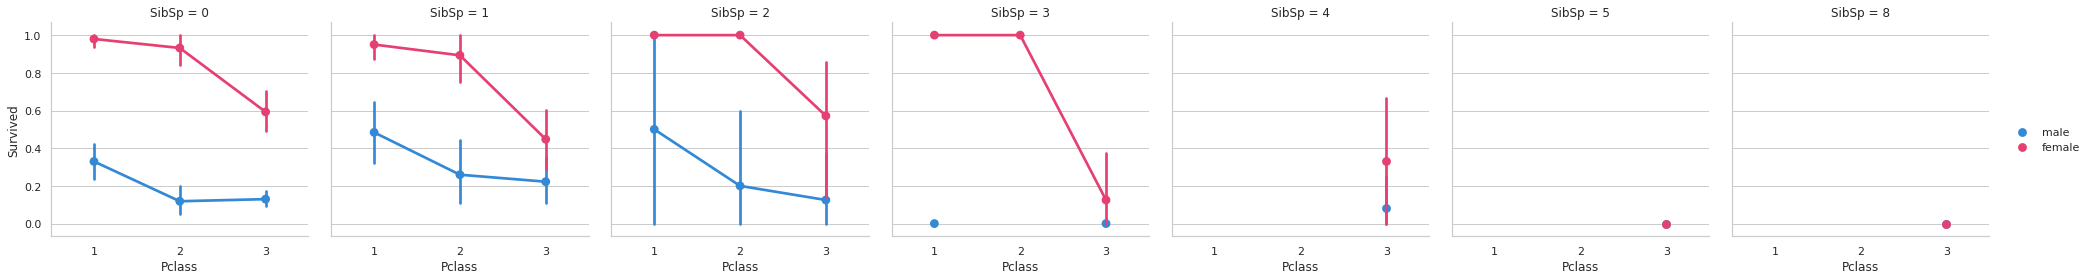

In [76]:
g = sns.FacetGrid(combi, col='SibSp', size=4) 
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=[1, 2, 3], hue_order=['male', 'female'], palette=male_female_pal) 
g.add_legend()
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


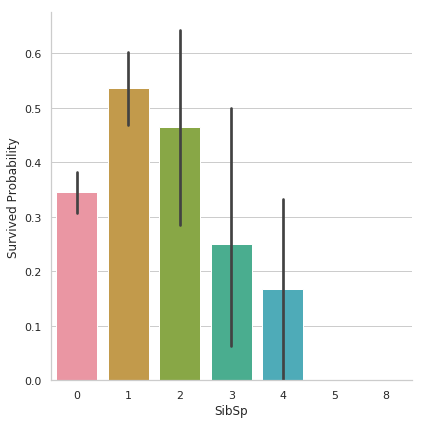

In [77]:
g=sns.factorplot(x="SibSp",y="Survived",data=combi,kind="bar",size=6)
g.set_ylabels("Survived Probability")
plt.show()

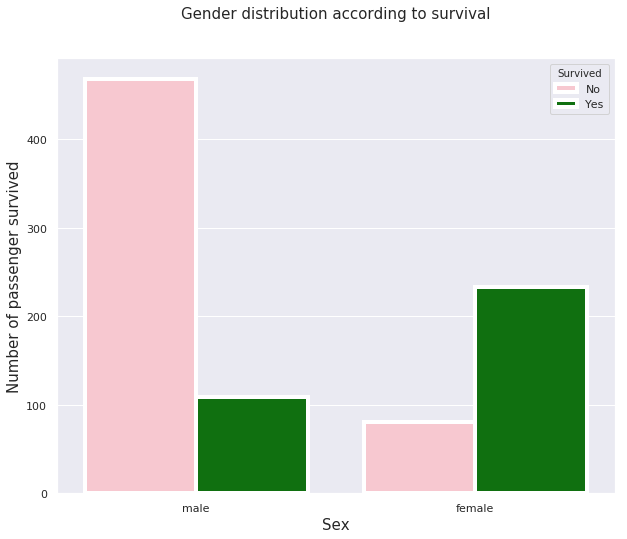

In [78]:
pal = {1:"green", 0:"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (10,8))
ax = sns.countplot(x = "Sex",  
                   hue="Survived", 
                   data = combi, 
                   linewidth=4, 
                   palette = pal)
## Fixing title, xlabel and ylabel
plt.title("Gender distribution according to survival", fontsize = 15, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("Number of passenger survived", fontsize = 15)
## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


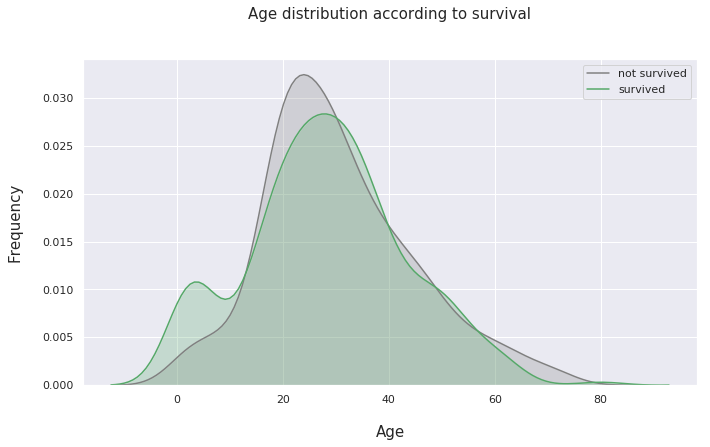

In [79]:
fig = plt.figure(figsize=(11,6),)
ax=sns.kdeplot(combi.loc[(combi['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(combi.loc[(combi['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age distribution according to survival', fontsize = 15, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

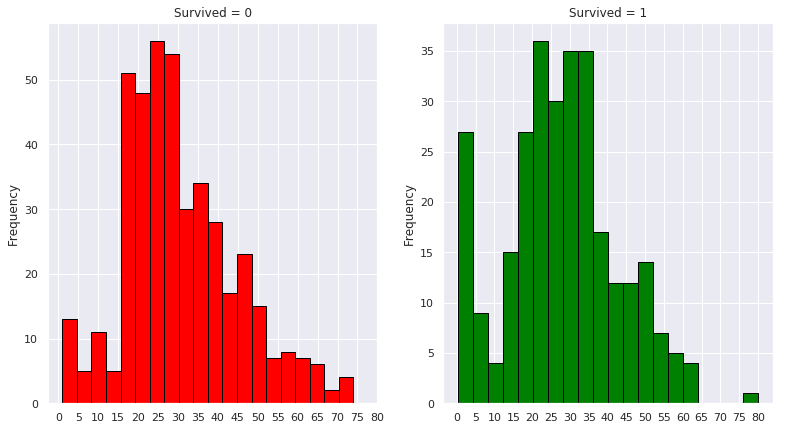

In [80]:
f, ax = plt.subplots(1,2, figsize = (13,7))
combi[combi['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black',color='red') 
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
combi[combi['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black',color='green') 
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)

# Encode Gender

In [81]:
combi["Gender_encode"] = (combi["Sex"] == "male").astype(int) 
print(combi.shape)
combi[["Sex", "Gender_encode"]].head()

(1309, 13)


,Sex,Gender_encode
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


# Fill out missing fare

In [82]:
combi.isnull().sum() 
mean_fare = train["Fare"].mean()
mean_fare
print("Fare(Mean) = ${0:.3f}".format(mean_fare))
combi["Fare_fillout"] = combi["Fare"] 


combi.loc[pd.isnull(combi["Fare"]), "Fare_fillout"] = mean_fare  
missing_fare = combi[pd.isnull(combi["Fare"])]  
print(missing_fare.shape)
missing_fare[["Fare", "Fare_fillout"]].head()

Fare(Mean) = $32.204
(1, 14)


,Fare,Fare_fillout
152,NaN,32.204208


# Encode Embarked

In [83]:
print(combi.info())  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age              1046 non-null float64
Cabin            295 non-null object
Embarked         1307 non-null object
Fare             1308 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         891 non-null float64
Ticket           1309 non-null object
Gender_encode    1309 non-null int64
Fare_fillout     1309 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 193.4+ KB
None


In [84]:
combi["Embarked"].unique() 

embarked = pd.get_dummies(combi["Embarked"], prefix="Embarked").astype(np.bool) 

print(embarked.shape)

embarked.head()

combi = pd.concat([combi, embarked], axis=1)
print(combi.shape)
combi[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(1309, 3)
(1309, 17)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,False,False,True
1,C,True,False,False
2,S,False,False,True
3,S,False,False,True
4,S,False,False,True


# Add Family

In [85]:
combi["Family"] = combi["SibSp"] + combi["Parch"] 
print(combi.shape)

combi[["SibSp", "Parch", "Family"]].head(10)
combi.head()

(1309, 18)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Gender_encode,Fare_fillout,Embarked_C,Embarked_Q,Embarked_S,Family
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,7.2500,False,False,True,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,0,71.2833,True,False,False,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,7.9250,False,False,True,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,0,53.1000,False,False,True,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,8.0500,False,False,True,0


# Split dataset into train and test

In [86]:
train = combi[pd.notnull(combi["Survived"])] 
print(train.shape)
train.head()

(891, 18)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Gender_encode,Fare_fillout,Embarked_C,Embarked_Q,Embarked_S,Family
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,7.2500,False,False,True,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,0,71.2833,True,False,False,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,7.9250,False,False,True,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,0,53.1000,False,False,True,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,8.0500,False,False,True,0


In [87]:
test = combi[pd.isnull(combi["Survived"])] 
test.drop("Survived", axis=1, inplace=True) 
print(test.shape)
test.head()

(418, 17)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Gender_encode,Fare_fillout,Embarked_C,Embarked_Q,Embarked_S,Family
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,330911,1,7.8292,False,True,False,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,363272,0,7.0000,False,False,True,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,240276,1,9.6875,False,True,False,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,315154,1,8.6625,False,False,True,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,3101298,0,12.2875,False,False,True,2


In [88]:
print(train.info())     
feature_names = ["Pclass", "Gender_encode", "Age", "Fare_fillout", "Family"]
feature_names = feature_names + list(embarked.columns)
feature_names

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 18 columns):
Age              714 non-null float64
Cabin            204 non-null object
Embarked         889 non-null object
Fare             891 non-null float64
Name             891 non-null object
Parch            891 non-null int64
PassengerId      891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
SibSp            891 non-null int64
Survived         891 non-null float64
Ticket           891 non-null object
Gender_encode    891 non-null int64
Fare_fillout     891 non-null float64
Embarked_C       891 non-null bool
Embarked_Q       891 non-null bool
Embarked_S       891 non-null bool
Family           891 non-null int64
dtypes: bool(3), float64(4), int64(6), object(5)
memory usage: 114.0+ KB
None


['Pclass',
 'Gender_encode',
 'Age',
 'Fare_fillout',
 'Family',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [89]:
label_name = "Survived"
label_name

X_train = train[feature_names]
print(X_train.shape)

X_train.head()

(891, 8)


,Pclass,Gender_encode,Age,Fare_fillout,Family,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,7.2500,1,False,False,True
1,1,0,38.0,71.2833,1,True,False,False
2,3,0,26.0,7.9250,0,False,False,True
3,1,0,35.0,53.1000,1,False,False,True
4,3,1,35.0,8.0500,0,False,False,True


In [90]:
X_train.isnull().sum() 

Pclass             0
Gender_encode      0
Age              177
Fare_fillout       0
Family             0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
dtype: int64

In [91]:
X_train['Age'].fillna(X_train['Age'].mean(), inplace = True) 
X_train.isnull().sum() 

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Pclass           0
Gender_encode    0
Age              0
Fare_fillout     0
Family           0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [92]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

**Score**

In [93]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 8)


,Pclass,Gender_encode,Age,Fare_fillout,Family,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,7.8292,0,False,True,False
1,3,0,47.0,7.0000,1,False,False,True
2,2,1,62.0,9.6875,0,False,True,False
3,3,1,27.0,8.6625,0,False,False,True
4,3,0,22.0,12.2875,2,False,False,True


In [94]:
X_test.isnull().sum() 
X_test['Age'].fillna(X_test['Age'].mean(), inplace = True) 
X_test.isnull().sum() 

Pclass           0
Gender_encode    0
Age              0
Fare_fillout     0
Family           0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

# DecisionTreeClassifier

In [95]:
seed = 37
model = DecisionTreeClassifier(max_depth=5, random_state=seed)

model.fit(X_train, y_train)


prediction = model.predict(X_train)
acc_perceptron = round(accuracy_score(prediction, y_train) * 100, 2)
print(acc_perceptron)


84.06


In [96]:
prediction = model.predict(X_test)
print(prediction.shape)
prediction[:20]


(418,)


array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0.])

# Preprocessing

# Train - Test data splitting

# Models

## Naive Bayes

## Logistic Regression

## SVM

In [ ]:
# svm



## KNN

## Decision Tree

# Holdout Prediction